## Looking for correlations between breakout points and department rating

Previously, we found that the the ratings of 2 sub-departments have hight correlation coefficient with the genral satisfaction rating. I.e: Accouning and HR.

In the following notebook we will deep dive into those rating and look for statistically significant correlation coefficient between the genral satisfaction and rating of the above mantioned sub departments and the in depth questions we asked regarding to each depratment performance.

We will mark questions as correlating with ratings when coralation score is a 0.5 and falls above the 75% percentile of the question group of questions. 

These questions will devide our finding into two groups of high correlations and low correlations.

1) **Low correlations** are questions whose score falls above the 75% precentile of groups questions with its department rating or the general satisfactio, but not both!

2) **High correlations** are questions whose score falls above the 75% precentile of groups questions with its department rating and the general satisfaction.

**Description of each question can be found in Data_Description.txt.**


In [15]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go
import plotly_express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv("effects_of_subquestions_on_ratings.csv")

In [25]:
df.shape

(182, 48)

### Establishing the relevant data frames
- Adding the break down questions and the departments rating and general satisfaction score 

In [18]:
account_rating = df[['satisfaction_score','rating_acct',"accounting_evaluation_breack_down_Q1", "accounting_evaluation_breack_down_Q2", "accounting_evaluation_breack_down_Q3", "accounting_evaluation_breack_down_Q4", "accounting_evaluation_breack_down_Q5", "accounting_evaluation_breack_down_Q6", "accounting_evaluation_breack_down_Q7", "accounting_evaluation_breack_down_Q8"]]
HR_rating = df[['satisfaction_score','rating_HR', 'HR_evaluation_breack_down_Q1', 'HR_evaluation_breack_down_Q2',
       'HR_evaluation_breack_down_Q3', 'HR_evaluation_breack_down_Q4',
       'HR_evaluation_breack_down_Q5', 'HR_evaluation_breack_down_Q6',
       'HR_evaluation_breack_down_Q7', 'HR_evaluation_breack_down_Q8',
       'HR_evaluation_breack_down_Q9', 'HR_evaluation_breack_down_Q10']]

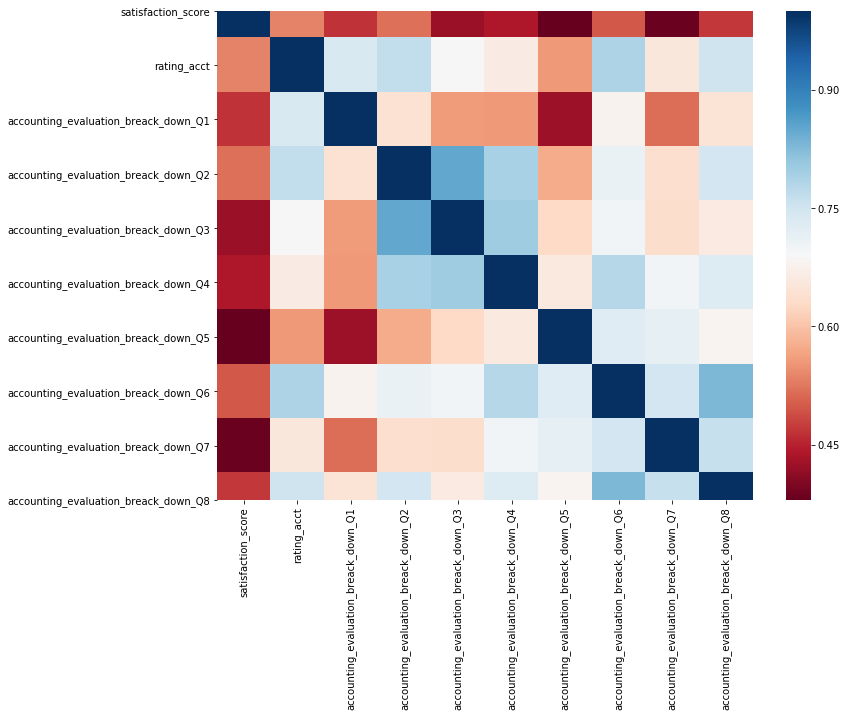

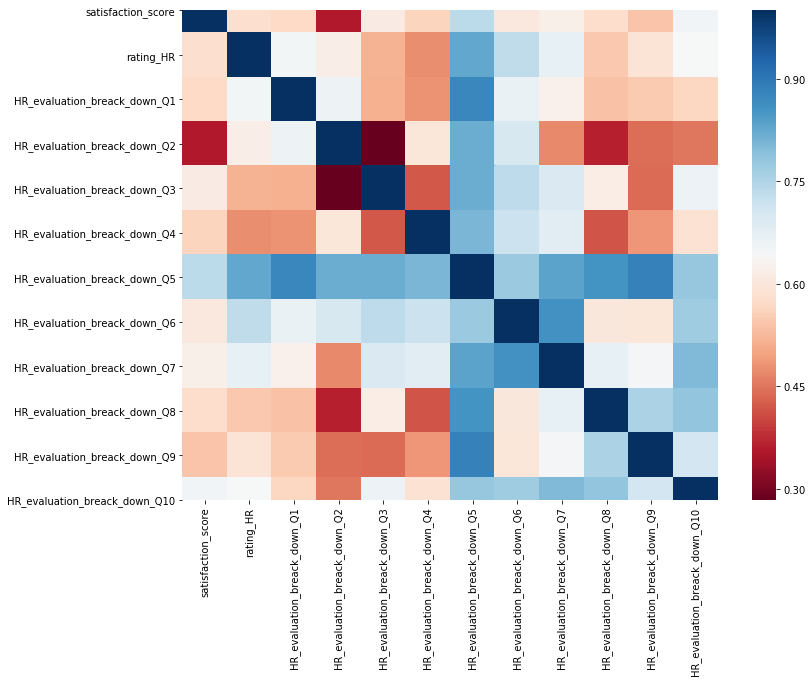

In [19]:
corr_list =[ account_rating, HR_rating]
for df in corr_list:
    df = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(df, vmax=1, cmap="RdBu");

In [20]:
# calling corrations function
account_rating_corr = account_rating.corr()[['satisfaction_score',"rating_acct"]]

In [21]:
account_rating_corr

,satisfaction_score,rating_acct
satisfaction_score,1.000000,0.537422
rating_acct,0.537422,1.000000
accounting_evaluation_breack_down_Q1,0.467113,0.739982
accounting_evaluation_breack_down_Q2,0.520271,0.766280
accounting_evaluation_breack_down_Q3,0.423205,0.689014
accounting_evaluation_breack_down_Q4,0.439376,0.665841
accounting_evaluation_breack_down_Q5,0.380331,0.556300
accounting_evaluation_breack_down_Q6,0.496928,0.785138
accounting_evaluation_breack_down_Q7,0.384255,0.654189
accounting_evaluation_breack_down_Q8,0.471903,0.755084


In [47]:
# taking out the department rating and 'satisfaction_score' to not to skew the percentiles 
account_rating_corr.loc[account_rating_corr.index.str.contains("accounting")].describe()

,satisfaction_score,rating_acct
count,8.000000,8.000000
mean,0.447923,0.701479
std,0.050547,0.075869
min,0.380331,0.556300
25%,0.413468,0.662928
50%,0.453244,0.714498
75%,0.478159,0.757883
max,0.520271,0.785138


In [50]:
# high correlation
account_rating_corr.loc[(account_rating_corr["satisfaction_score"] >= 0.5  ) & (account_rating_corr["rating_acct"] >= 0.757883)]

,satisfaction_score,rating_acct
rating_acct,0.537422,1.00000
accounting_evaluation_breack_down_Q2,0.520271,0.76628


In [51]:
#low correlation
account_rating_corr.loc[(account_rating_corr["satisfaction_score"] >= 0.5  ) | (account_rating_corr["rating_acct"] >= 0.757883)]

,satisfaction_score,rating_acct
satisfaction_score,1.000000,0.537422
rating_acct,0.537422,1.000000
accounting_evaluation_breack_down_Q2,0.520271,0.766280
accounting_evaluation_breack_down_Q6,0.496928,0.785138


In [52]:
HR_rating_corr = HR_rating.corr()[['satisfaction_score',"rating_HR"]]

In [54]:
# taking out the department rating and 'satisfaction_score' to not to skew the percentiles 
HR_rating_corr.loc[HR_rating_corr.index.str.contains("HR")].describe()

,satisfaction_score,rating_HR
count,11.000000,11.000000
mean,0.583984,0.661953
std,0.092716,0.149402
min,0.356927,0.474747
25%,0.566803,0.569838
50%,0.582954,0.643787
75%,0.617922,0.702227
max,0.738625,1.000000


In [57]:
# high correlation
HR_rating_corr.loc[(HR_rating_corr["satisfaction_score"] >= 0.617922) & (HR_rating_corr["rating_HR"] >= 0.702227)]

,satisfaction_score,rating_HR
HR_evaluation_breack_down_Q5,0.738625,0.829049


In [58]:
#low correlation
HR_rating_corr.loc[(HR_rating_corr["satisfaction_score"] >= 0.617922) | (HR_rating_corr["rating_HR"] >= 0.702227)]

,satisfaction_score,rating_HR
satisfaction_score,1.000000,0.582954
rating_HR,0.582954,1.000000
HR_evaluation_breack_down_Q5,0.738625,0.829049
HR_evaluation_breack_down_Q6,0.604132,0.732194
HR_evaluation_breack_down_Q7,0.622459,0.672260
HR_evaluation_breack_down_Q10,0.655442,0.643787


## Finding and discussions

The result of subquestions and rating of individual departments as well as satisfaction score are positively correlated. According to their correlation coefficients, we categorize those questions into three groups. 

#### High:
- accounting_evaluation_breack_down_Q2 : **Satisfaction with referrals regarding expenditure.**
- HR_evaluation_breack_down_Q5 : **Off-boarding process**

#### Medium:  
- accounting_evaluation_breack_down_Q6 : **Professionalism of the accounting department staff**
- HR_evaluation_breack_down_Q6 : **Relocation and reassignment process**

#### Low: 
- accounting_evaluation_breack_down_Q1 : **Satisfaction with referrals regarding payrolls**
- HR_evaluation_breack_down_Q7: **Professionalism of the HR department staff**
- HR_evaluation_breack_down_Q10: **To what degree are you comfortable talking with HR about your problems**

